[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/notebooks/ソフトバンクvs楽天.ipynb)

# ソフトバンク株式会社 vs 楽天グループ株式会社

ソフトバンク株式会社...移動通信サービスの提供、携帯端末の販売、固定通信サービスの提供、インターネット接続サービスの提供<br>
楽天グループ株式会社...ECサイト, インベストメント, フィンテック<br>



### 参照
https://www.softbank.jp/corp/set/data/ir/documents/financial_reports/fy2023/pdf/sbkk_financial_report_20240509.pdf

In [1]:
# calculate_EXVAL ディレクトリに格納されているクラスをインストール
! pip install git+https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git
from calculate_EXVAL import DiversifyApproach
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Cloning https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git to /private/var/folders/g_/z45jvr095xx_y26gdztl1fbc0000gn/T/pip-req-build-q6kj7tt6
  Running command git clone --filter=blob:none --quiet https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git /private/var/folders/g_/z45jvr095xx_y26gdztl1fbc0000gn/T/pip-req-build-q6kj7tt6
  Resolved https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git to commit 2307f6d6f817ae106ec80d4b42b1b40abb68e7de
  Preparing metadata (setup.py) ... done


### ソフトバンク株式会社

**財務データ参照先**<br>
https://www.softbank.jp/corp/set/data/ir/documents/financial_reports/fy2023/pdf/sbkk_financial_report_20240509.pdf


In [2]:
# ソフトバンク株式会社の必要データを準備
softbank_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/Softbank_category.csv",
    encoding = "UTF-8"
    ).set_index("Category")


softbank_data

,Consumer,Enterprise,Distribution,Media,Finance
Category,,,,,
Sales,4955,1672,262,1980,-58


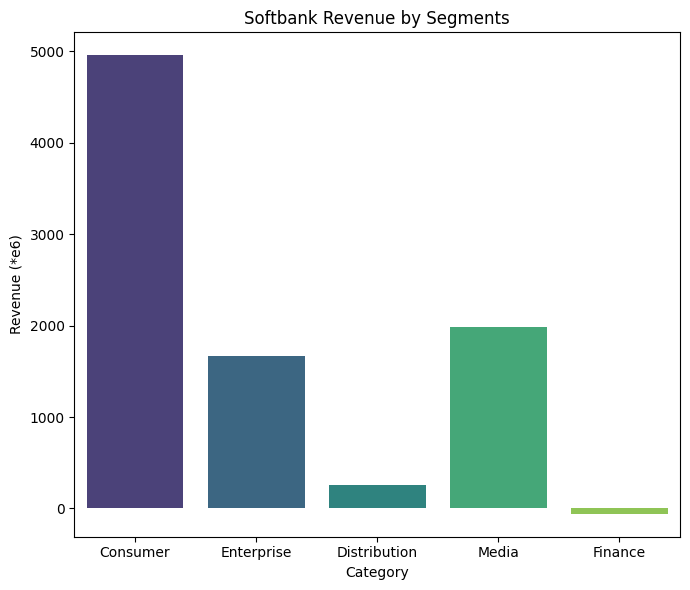

In [8]:
df = softbank_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Softbank Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://group.softbank/system/files/pdf/ir/financials/annual_reports/financial-report_fy2024_ja.pdf
- コンシューマ<br>
(a) モバイルサービス及び携帯端末の販売<br>
(b)ブロードバンドサービス<br>
(c)でんき<br>
- エンタープライズ<br>
(a) モバイルサービス及び携帯端末レンタルサービス<br>
(b)固定通信サービス(音声伝送サービスおよびデータ伝送サービス)<br>
(c)ソリューション等(データセンター、クラウド、セキュリティ、グローバル、AI、IoT、機器販売)<br>
- ディストリビューション<br>
法人顧客向けのICT、クラウド、IoTソリューション等に対応したハードウエア、ソフトウエア、サービスなどの商材、個人顧客向けのモバイルアクセサリー、PCソフトウエア、IoTプロダクト等の商材の販売
- メディア・EC<br>
(a) メディア(検索広告、アカウント広告、ディスプレイ広告の収入)<br>
(b)コマース(アスクルグループの物品販売サービス、「ZOZOTOWN」や「 Yahoo!オークション」等のEC関連サービスの収入)<br>
- ファイナンス<br>
主にQRコードによる代金決済サービスの提供により生じる加盟店手数料


In [ ]:
# セグメント値の設定
seg1_value = softbank_data["Consumer"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = softbank_data["Enterprise"].iloc[0] * 1e6
seg3_value = softbank_data["Distribution"].iloc[0] * 1e6 
seg4_value = softbank_data["Media"].iloc[0] * 1e6
seg5_value = softbank_data["Finance"].iloc[0] * 1e6

seg_list = [seg1_value, seg2_value, seg3_value, seg4_value, seg5_value]

# 専業企業リスト
Consumer = ["NFLX", "DBX", "SPOT"]
Enterprise = ["HPQ", "DELL", "LNVGY"]
Distribution = []
Media = []
Finance = ["3769.T", "4051.T", "4072", "4689.T", "4755.T", "4015.T", "2428.T", "3623.T"] # GMO-PG, GMO-FG, 電算システム, LINEヤフー, 楽天G, ペイクラウド, ウェルネット, ビリングシステム
specialized_tickers = [Consumer, Enterprise, Distribution,Media, Finance]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "9434.T", # SoftBank
    specialized_tickers = specialized_tickers,
    data = softbank_data
)

# Appleの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 15929827748800.0
超過価値 (EXVAL): 5.943657286040148


### 楽天グループ株式会社

In [6]:
# ソフトバンク株式会社の必要データを準備
rakuten_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/RAKUTEN.csv",
    encoding = "UTF-8"
    ).set_index("Category")


rakuten_data

,Services,FinTech,Mobile
Category,,,
Sales,314570,208229,105986


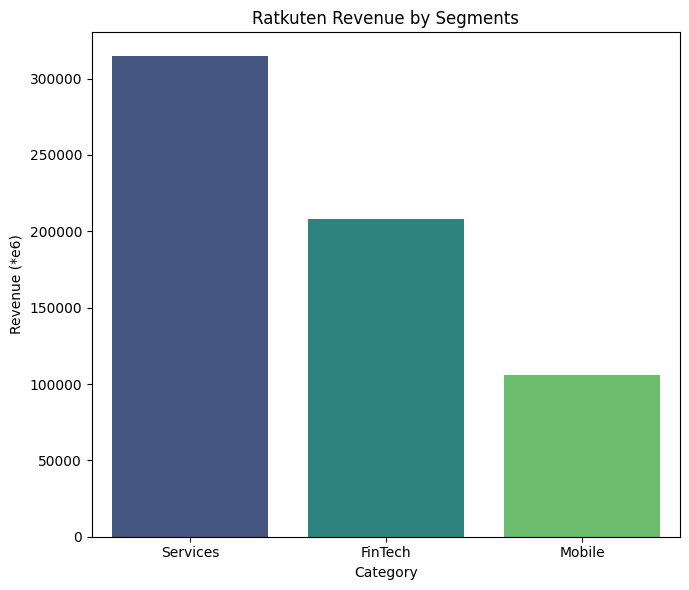

In [7]:
df = rakuten_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Ratkuten Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()